# Random Image Slash
A 6x6 black-and-white image is represented as a Numpy array x as in the following,

    >>> import numpy as np
    >>> x = np.eye(6)

Note that this is not a grayscale or color image for which there would be three dimensions (e.g., 6 x 6 x 3). This can easily be visualized using Matplotlib's imshow function, as in the following:

    >>> from matplotlib.pylab import subplots, cm
    >>> fig, ax = subplots()
    >>> ax.imshow(x,cmap=cm.gray_r)

To debug an image processing algorithm, you have to generate a large number of exemplar training images that consist of such Numpy arrays. Each image should represent a forward or backward leaning slash symbol. Each symbol must consist of at least two non-zero pixels. For example, the longest possible slash symbol that is representable in a 6x6 image is the 6 nonzero pixel diagonal image show above (or its opposite leaning forwardslash variant).

The assignment is to write a function that can produce a uniformly random forward or backslashed image (i.e., Numpy array) of at least two non-zero pixels. Here is some code that generates the following figure,

    fig,axs=subplots(3,3,sharex=True,sharey=True)
    for ax in axs.flatten():
        ax.imshow(gen_rand_slash(),cmap=cm.gray_r)


Here is the function signature: gen_rand_slash(m=6,n=6,direction='back'). The direction keyword argument can be either back or forward.

In [1]:
import numpy as np
from matplotlib.pylab import subplots, cm
import random

In [2]:
def gen_rand_slash(m=6,n=6,direction='back'):
    assert isinstance(m,int)
    assert isinstance(n,int)
    assert m>=2
    assert n>=2
    assert direction=='back' or direction=='forward'
    
    # length of non-zero pixels
    max_len = min(m,n)
    len_array = random.choice(range(2,max_len+1))
    
    array = np.zeros([m,n])
    
    if direction=='back':
        # start position
        r_pos = random.choice(range(m-len_array+1))
        c_pos = random.choice(range(n-len_array+1))
        for i in range(len_array):
            array[r_pos][c_pos] = 1
            r_pos += 1
            c_pos += 1
    else:
        # start position
        r_pos = random.choice(range(m-len_array+1))
        c_pos = random.choice(range(len_array-1,n))
        for i in range(len_array):
            array[r_pos][c_pos] = 1
            r_pos += 1
            c_pos -= 1        
    
    return array

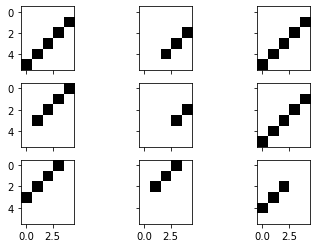

In [3]:
fig,axs=subplots(3,3,sharex=True,sharey=True)
for ax in axs.flatten():
    ax.imshow(gen_rand_slash(m=6,n=5,direction='forward'),cmap=cm.gray_r)

In [4]:
assert gen_rand_slash(3,2).sum().sum()>=2
assert gen_rand_slash(3,2,direction='forward').sum().sum()>=2